In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits,fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
digits=load_digits()

In [3]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [4]:
def plot_images(data, target, figsize=(20,5), img_shape=(8,8)):
    plt.figure(figsize=figsize)
    for index, (image, label) in enumerate(zip(data[:5],target[:5])):
        plt.subplot(1,5,index+1)
        plt.imshow(np.reshape(image, img_shape), cmap=plt.cm.gray)
        plt.title("Training %i\n" % label, fontsize=20)

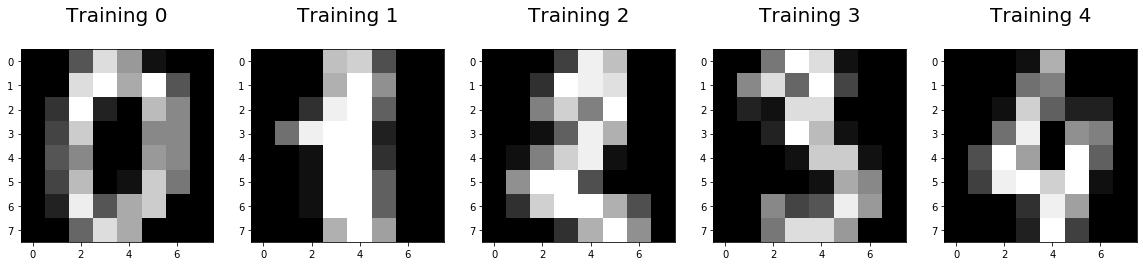

In [5]:
plot_images(digits.data , digits.target)

In [6]:
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,
                                               test_size=0.25,random_state=0)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
clf=LogisticRegression()

In [10]:
clf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
y_pred=clf.predict(x_test)

In [12]:
score=accuracy_score(y_pred,y_test)
print(score)

0.9533333333333334


In [13]:
confusion_matrix(y_pred,y_test)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  1,  0,  1,  3,  0],
       [ 0,  0, 41,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  3, 43,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 38,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  1],
       [ 0,  2,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 44]], dtype=int64)

In [14]:
def get_misclassified_index(y_pred,y_test):
    misclassifications=[]
    for index, (predicted,actual) in enumerate(zip(y_pred,y_test)):
        if predicted != actual:
            misclassifications.append(index)
    return misclassifications

In [15]:
def plot_misclassifications(misclassifications,figsize=(20,4) ,
                            img_shape=(8,8), limit=5):
    plt.figure(figsize=(20,4))
    for index,wrong in enumerate(misclassifications[0:limit]):
        plt.subplot(1, 5, index+1)
        plt.imshow(np.reshape(x_test[wrong], img_shape),cmap=plt.cm.gray)
        plt.title("Predicted: {} Actual {}".format
                  (y_pred[wrong],y_test[wrong]))
        print(wrong)

In [16]:
misclassifications=get_misclassified_index(y_pred,y_test)

37
94
109
124
130


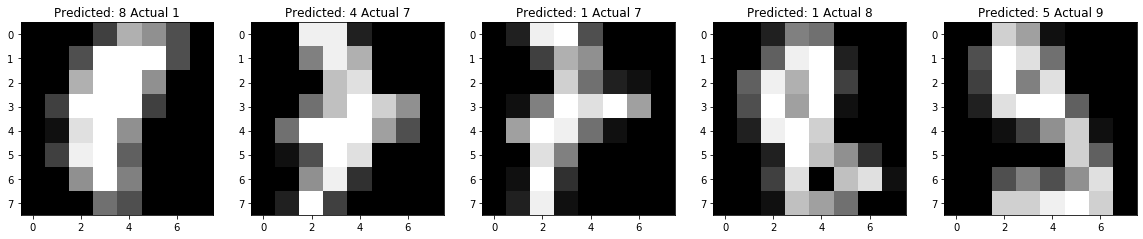

In [17]:
plot_misclassifications(misclassifications)

# Decision Tree and Random Forest- 24/04/20

In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [19]:
ds=pd.read_csv('diabetes.csv')

In [20]:
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [21]:
ds.shape

(768, 9)

In [22]:
x=ds.iloc[:,:-1].values
y=ds.iloc[:,-1]

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [25]:
clfdt=DecisionTreeClassifier()

In [26]:
clfdt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
y_pred=clfdt.predict(x_test)

In [28]:
accuracy_score(y_test,y_pred)

0.7316017316017316

In [29]:
clfRf=RandomForestClassifier()

In [30]:
clfRf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
y_pred=clfRf.predict(x_test)

In [32]:
accuracy_score(y_test,y_pred)

0.7662337662337663